## Matplotlib annotations

In [2]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

0       7,127
1      17,718
2      30,216
3       2,991
4       3,301
        ...  
156    12,518
157    37,652
158    14,634
159     1,304
160    12,207
Name: Total foreign born, Length: 161, dtype: object

In [6]:
df["Total foreign born"].iloc[0]

'7,127'

In [10]:

columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]
df_nordic

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"
...,...,...,...,...,...
156,45,2,52,3,"12,518"
157,"7,542",269,"1,143",153,"37,652"
158,289,46,6,81,"14,634"
159,10,1,NaN,NaN,"1,304"


In [19]:
for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

df_nordic

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,7127
1,65,12,3,21,17718
2,186,9,5,15,30216
3,5,2,0,5,2991
4,32,4,3,5,3301
...,...,...,...,...,...
156,45,2,52,3,12518
157,7542,269,1143,153,37652
158,289,46,6,81,14634
159,10,1,0,0,1304


In [14]:
df_nordic = df_nordic.fillna("0")

df_nordic

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,7127
1,65,12,3,21,17718
2,186,9,5,15,30216
3,5,2,0,5,2991
4,32,4,3,5,3301
...,...,...,...,...,...
156,45,2,52,3,12518
157,7542,269,1143,153,37652
158,289,46,6,81,14634
159,10,1,0,0,1304


In [20]:
df[columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sweden              161 non-null    int64
 1   Norway              161 non-null    int64
 2   Finland             161 non-null    int64
 3   Denmark             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [30]:
df_nordic = duckdb.query("""--sql
    WITH nordic as(
             FROM df
                SELECT
                    state,
                    SUM("Total foreign born") AS "Total foreigners",
                    SUM(Sweden) AS Swedes,
                    SUM(Norway) AS Norwegians,
                    SUM(Finland) AS Finnish,
                    SUM(Denmark) AS Danish
                GROUP BY state
                )
        from nordic n
        SELECT *, n.Swedes + n.Norwegians + n.Danish + n.Finnish AS total_nords
        ORDER BY 
             total_nords
        DESC
""").df()

df_nordic.head()

,State,Total foreigners,Swedes,Norwegians,Finnish,Danish,total_nords
0,Illinois,627465.0,57158.0,22300.0,447.0,10374.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,1101.0,2975.0,56147.0
2,New York,1521931.0,29961.0,11752.0,3764.0,6186.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,3154.0,1451.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,405.0,4024.0,14948.0


In [31]:
df_nordic.shape

(39, 7)

In [37]:
import matplotlib.pyplot as plt

top3_nordic = df_nordic.drop(["Total foreigners", "total_nords"], axis=1).set_index("State").iloc[:3]

top3_nordic

,Swedes,Norwegians,Finnish,Danish
State,,,,
Illinois,57158.0,22300.0,447.0,10374.0
Minnesota,34984.0,17087.0,1101.0,2975.0
New York,29961.0,11752.0,3764.0,6186.0


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

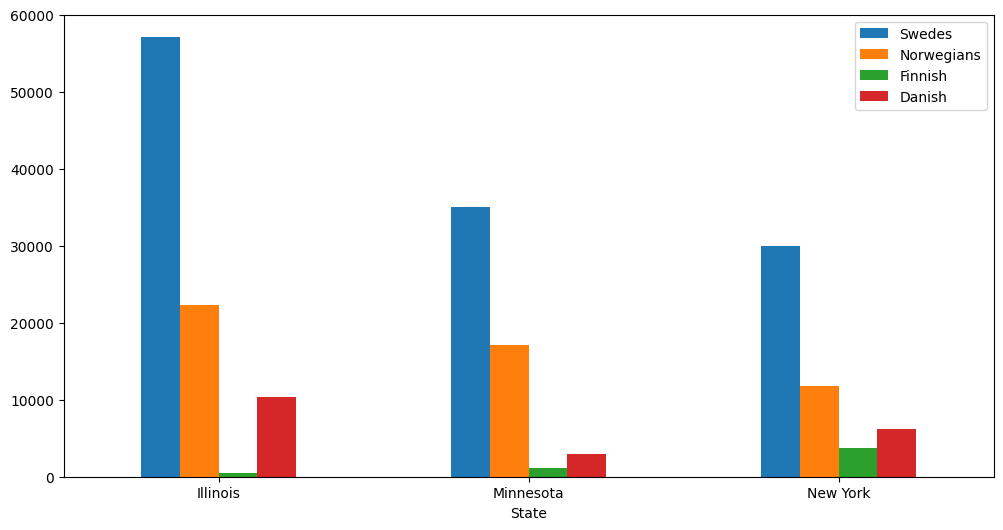

In [47]:
def nordic_plot():
    ax = top3_nordic.plot(kind="bar", figsize=(12,6))
    ax.set_xticklabels(top3_nordic.index, rotation=0)

    fig = ax.get_figure()

    return fig, ax

nordic_plot()


[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

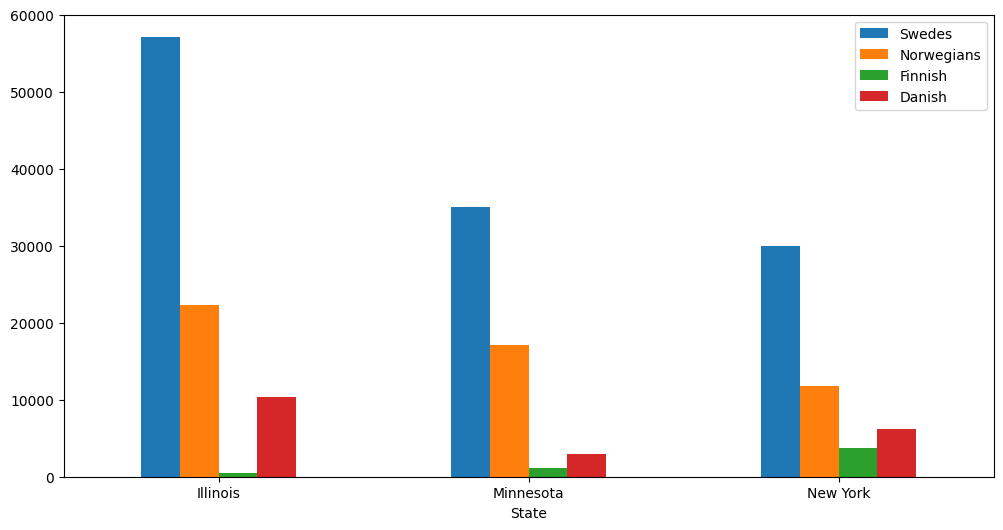

In [50]:
fig, ax = nordic_plot()

ax.containers

In [52]:
ax.containers[0]

<BarContainer object of 3 artists>

In [58]:
ax.containers[0][1].get_height(), ax.containers[0][0].get_x()

(np.float64(34984.0), np.float64(-0.25))

## Annotate

Text(0.8, 42000, 'Swedes')

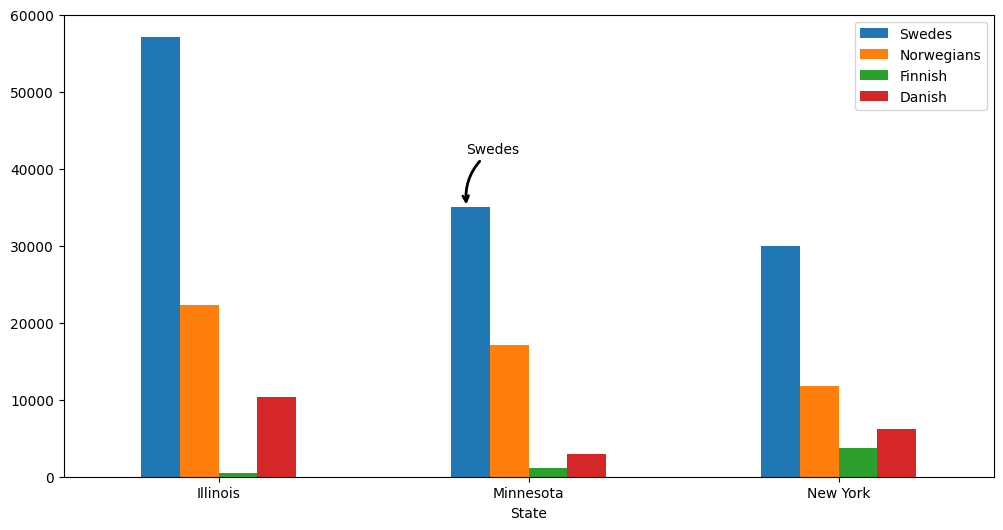

In [67]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle="arc3, rad=.3")
ax.annotate(text = "Swedes", xy=(0.8, 35000), arrowprops=arrowprops, xytext=(0.8, 42000))

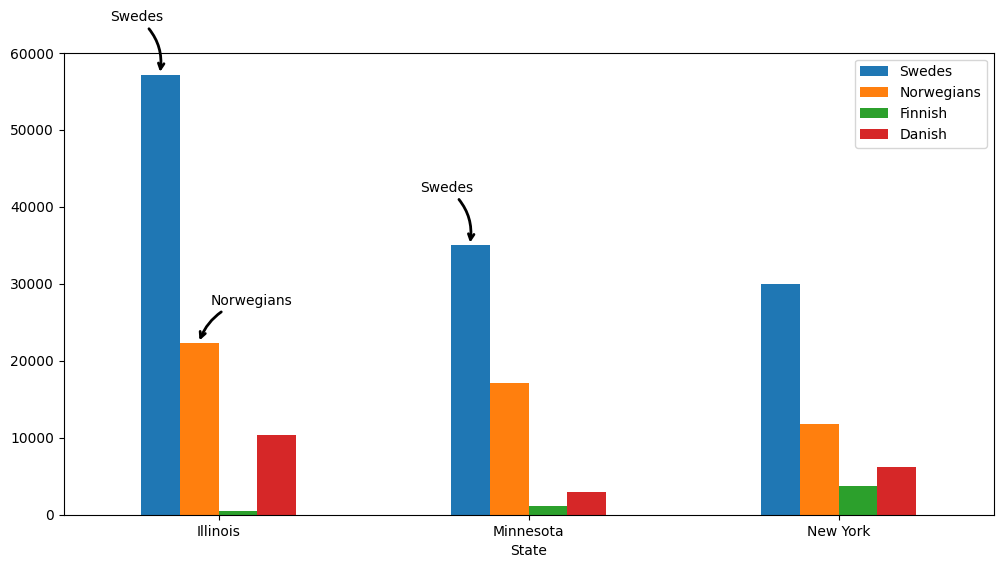

In [82]:
fig, ax = nordic_plot()

swede_bars, norwegian_bars, finnish_bars, danish_bars = ax.containers

def annotate_nordic(bar_artist, text, x_offset, y_offset):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    rad = .3 if x_offset > 0 else -0.3

    arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle=f"arc3, rad= {rad}")
    ax.annotate(text = text, xy=(xy[0] + .06, xy[1]), arrowprops=arrowprops, xytext=(xy[0] + x_offset, xy[1] + y_offset))
                
annotate_nordic(swede_bars[1],"Swedes", -0.1, 7000)
annotate_nordic(norwegian_bars[0],"Norwegians", 0.1, 5000)
annotate_nordic(swede_bars[0], "Swedes", -0.1, 7000)